In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./cancer_dataset.csv")

In [3]:
df

,district,last_cancer_screening,current_cancer,have_children,gender,weight,height,age,red_meat_weekly,veg_weekly,...,breast_q1,breast_q2,breast_q3,breast_q4,breast_q5,liver_q1,liver_q2,liver_q3,liver_q4,liver_q5
0,District 5,A year ago,No,Yes,Female,56,160.0,30,2,8.0,...,No,No,No,No,No,No,No,No,No,No
1,Binh Tan District,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes
2,District 3,A year ago,No,Yes,Female,60,162.0,31,3,14.0,...,No,No,No,No,No,No,No,No,No,No
3,Tan Binh District,A year ago,No,Yes,Male,72,175.0,30,4,6.0,...,No,No,No,No,No,No,Yes,No,No,Yes
4,District 1,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Binh Thanh District,A year ago,No,NaN,Female,52,153.0,46,2,7.0,...,No,No,No,No,No,No,Yes,Yes,No,Yes
179,Thu Duc District,A year ago,No,NaN,Female,61,158.0,40,4,7.0,...,No,No,No,No,No,No,No,No,No,No
180,District 12,A year ago,No,NaN,Male,59,163.0,65,1,7.0,...,No,No,No,No,No,No,No,No,No,No
181,District 12,6 months ago,No,NaN,Female,52,155.0,55,2,7.0,...,No,No,No,No,No,No,No,No,No,No


In [4]:
df.columns

Index(['district', 'last_cancer_screening', 'current_cancer', 'have_children',
       'gender', 'weight', 'height', 'age', 'red_meat_weekly', 'veg_weekly',
       'alc_weekly', 'exercise_weekly', 'sleep_hr', 'fam_hr', 'neighbor_hr',
       'cancer_his', 'have_cancer_before', 'chronic_disease',
       'chronic_dis_list', 'breast_q1', 'breast_q2', 'breast_q3', 'breast_q4',
       'breast_q5', 'liver_q1', 'liver_q2', 'liver_q3', 'liver_q4',
       'liver_q5'],
      dtype='object')

In [5]:
columns_to_check = ['breast_q1', 'breast_q2', 'breast_q3', 'breast_q4',
       'breast_q5', 'liver_q1', 'liver_q2', 'liver_q3', 'liver_q4']
df["has_cancer"] = df[columns_to_check].apply(lambda row: 'Yes' if 'Yes' in row.values else 'No', axis=1)
df

,district,last_cancer_screening,current_cancer,have_children,gender,weight,height,age,red_meat_weekly,veg_weekly,...,breast_q2,breast_q3,breast_q4,breast_q5,liver_q1,liver_q2,liver_q3,liver_q4,liver_q5,has_cancer
0,District 5,A year ago,No,Yes,Female,56,160.0,30,2,8.0,...,No,No,No,No,No,No,No,No,No,No
1,Binh Tan District,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes
2,District 3,A year ago,No,Yes,Female,60,162.0,31,3,14.0,...,No,No,No,No,No,No,No,No,No,No
3,Tan Binh District,A year ago,No,Yes,Male,72,175.0,30,4,6.0,...,No,No,No,No,No,Yes,No,No,Yes,Yes
4,District 1,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Binh Thanh District,A year ago,No,NaN,Female,52,153.0,46,2,7.0,...,No,No,No,No,No,Yes,Yes,No,Yes,Yes
179,Thu Duc District,A year ago,No,NaN,Female,61,158.0,40,4,7.0,...,No,No,No,No,No,No,No,No,No,No
180,District 12,A year ago,No,NaN,Male,59,163.0,65,1,7.0,...,No,No,No,No,No,No,No,No,No,No
181,District 12,6 months ago,No,NaN,Female,52,155.0,55,2,7.0,...,No,No,No,No,No,No,No,No,No,No


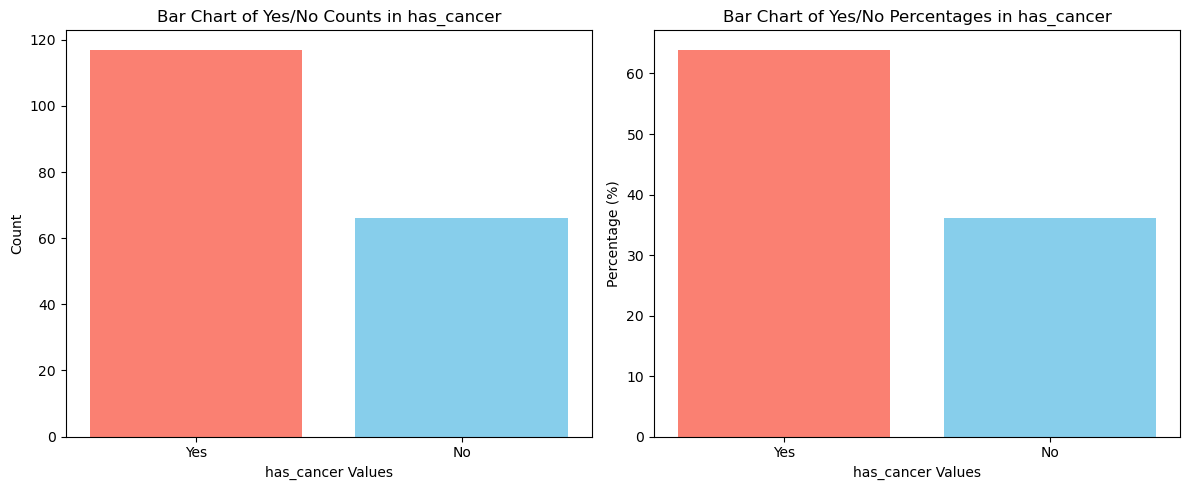

has_cancer
Yes    117
No      66
Name: count, dtype: int64

In [6]:
counts = df['has_cancer'].value_counts()


# Calculate percentages
percentages = counts / counts.sum() * 100

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart with Counts
axs[0].bar(counts.index, counts.values, color=['salmon', 'skyblue'])
axs[0].set_title('Bar Chart of Yes/No Counts in has_cancer')
axs[0].set_xlabel('has_cancer Values')
axs[0].set_ylabel('Count')

# Bar Chart with Percentages
axs[1].bar(percentages.index, percentages.values, color=['salmon', 'skyblue'])
axs[1].set_title('Bar Chart of Yes/No Percentages in has_cancer')
axs[1].set_xlabel('has_cancer Values')
axs[1].set_ylabel('Percentage (%)')

# Adjust layout
plt.tight_layout()
plt.show()
counts

In [7]:
df.drop(columns=['breast_q1', 'breast_q2', 'breast_q3', 'breast_q4',
       'breast_q5', 'liver_q1', 'liver_q2', 'liver_q3', 'liver_q4',
       'liver_q5', 'current_cancer', "have_cancer_before", "district", "chronic_dis_list", "fam_hr"], inplace=True)
df

,last_cancer_screening,have_children,gender,weight,height,age,red_meat_weekly,veg_weekly,alc_weekly,exercise_weekly,sleep_hr,neighbor_hr,cancer_his,chronic_disease,has_cancer
0,A year ago,Yes,Female,56,160.0,30,2,8.0,3,6,9.0,4.0,No,No,No
1,A year ago,Yes,Male,63,165.0,40,3,5.0,2,3,6.0,3.0,Yes,Yes,Yes
2,A year ago,Yes,Female,60,162.0,31,3,14.0,3,2,7.0,2.0,No,Yes,No
3,A year ago,Yes,Male,72,175.0,30,4,6.0,1,3,6.0,1.0,No,No,Yes
4,A year ago,Yes,Male,63,165.0,40,3,5.0,2,3,7.0,2.0,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,A year ago,NaN,Female,52,153.0,46,2,7.0,0,7,7.0,0.5,No,Yes,Yes
179,A year ago,NaN,Female,61,158.0,40,4,7.0,1,7,9.0,1.0,No,No,No
180,A year ago,NaN,Male,59,163.0,65,1,7.0,1,6,6.5,1.5,No,Yes,No
181,6 months ago,NaN,Female,52,155.0,55,2,7.0,0,6,6.5,1.0,No,Yes,No


In [8]:
df = df.replace(to_replace = ['Yes','No'],value = ['True','False'])
df2 = pd.get_dummies(df)
df2.columns

Index(['weight', 'height', 'age', 'red_meat_weekly', 'veg_weekly',
       'alc_weekly', 'exercise_weekly', 'sleep_hr', 'neighbor_hr',
       'last_cancer_screening_6 months ago',
       'last_cancer_screening_A year ago', 'have_children_False',
       'have_children_True', 'gender_Female', 'gender_Male',
       'cancer_his_False', 'cancer_his_Not sure', 'cancer_his_True',
       'chronic_disease_False', 'chronic_disease_Not sure',
       'chronic_disease_True', 'has_cancer_False', 'has_cancer_True'],
      dtype='object')

In [9]:
df2.drop(columns=['has_cancer_False', "cancer_his_False", "has_children_False"], inplace=True)
df2.rename(columns={'has_cancer_True': 'has_cancer'}, inplace=True)
df2 = df2.dropna()
df2

KeyError: "['has_children_False'] not found in axis"

In [ ]:
X = df2.drop(columns=['has_cancer'])
y = df2['has_cancer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
actual_counts = y_test.value_counts().sort_index()  # Actual values
predicted_counts = pd.Series(y_pred).value_counts().sort_index()  # Predicted values

actual_percentages = actual_counts / actual_counts.sum() * 100
predicted_percentages = predicted_counts / predicted_counts.sum() * 100

# Step 8: Plot both frequencies side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot actual frequencies
axes[0].bar(actual_counts.index.map({False: 'No', True: 'Yes'}), actual_counts, color=['skyblue', 'salmon'])
axes[0].set_title('Actual Cancer Status')
axes[0].set_xlabel('Cancer Status')
axes[0].set_ylabel('Frequency')

for i, v in enumerate(actual_counts):
    axes[0].text(i, v + 0.1, f'{actual_percentages[i]:.1f}%', ha='center', color='black')

# Plot predicted frequencies
axes[1].bar(predicted_counts.index.map({False: 'No', True: 'Yes'}), predicted_counts, color=['skyblue', 'salmon'])
axes[1].set_title('Predicted Cancer Status')
axes[1].set_xlabel('Cancer Status')
axes[1].set_ylabel('Frequency')

for i, v in enumerate(predicted_counts):
    axes[1].text(i, v + 0.1, f'{predicted_percentages[i]:.1f}%', ha='center', color='black')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
importance = np.abs(model.coef_[0])
feature_names = X.columns  # Get feature names from the DataFrame

sorted_indices = np.argsort(importance)
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Visualize feature importance
plt.figure(figsize=(6, 20))
plt.barh(sorted_feature_names, sorted_importance, color="skyblue")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.gca().invert_yaxis()
plt.show()